In [3]:
library(readr)
library(dplyr)
library(ggplot2)

In [9]:
f = read.table('./Hugs_photometry/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc2808_multi_v1_catalog-meth1.txt')
head(f)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,4106.563,1413.546,-99.9999,99.9999,0,9.9999,0,0,-99.9999,99.9999,⋯,0,0.9999,0.0053,1,1,-1,138.0360,-64.90286,R0000001,1
2,4094.256,1447.025,-99.9999,99.9999,0,9.9999,0,0,-99.9999,99.9999,⋯,0,0.9999,-0.0052,1,1,-1,138.0363,-64.90249,R0000002,1
3,4125.776,1467.510,-99.9999,99.9999,0,9.9999,0,0,-99.9999,99.9999,⋯,0,0.9996,-0.0150,1,1,-1,138.0355,-64.90227,R0000003,1
4,4225.479,1498.310,-99.9999,99.9999,0,9.9999,0,0,-99.9999,99.9999,⋯,0,0.9999,-0.0030,1,1,-1,138.0329,-64.90193,R0000004,1
5,4290.442,1519.384,-99.9999,99.9999,0,9.9999,0,0,-99.9999,99.9999,⋯,0,0.9999,0.0022,1,1,-1,138.0313,-64.90170,R0000005,1
6,4285.702,1534.798,-99.9999,99.9999,0,9.9999,0,0,-99.9999,99.9999,⋯,0,0.9999,0.0066,1,1,-1,138.0314,-64.90153,R0000006,1


In [28]:
f_rename = f %>% rename(F275W=V3,F336W=V9,F438W=V15,F606W=V22,F814W=V27) #rename the relevant photomentric columns
f_clean = f_rename %>% filter(F275W>-99.,F336W>-99.,F438W>-99.,F606W>-99.,F814W>-99.)
head(f_clean)

#f_w_color = f %>% transmute(,)

,V1,V2,F275W,V4,V5,V6,V7,V8,F336W,V10,⋯,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,6506.404,2705.309,21.5271,0.0080,0.9960,-0.0036,2,1,20.7220,0,⋯,0.0000,0.9999,0.1111,1,1,-1,137.9740,-64.88868,R0001096,1
2,6596.026,2712.453,21.3081,0.0085,0.9966,0.0120,2,1,20.5475,0,⋯,0.0000,0.9999,0.0037,1,1,-1,137.9717,-64.88859,R0001113,1
3,6540.906,2713.783,21.4759,0.0000,0.9956,-1.0000,1,1,20.6141,0,⋯,0.0000,0.9999,0.0045,1,1,-1,137.9731,-64.88858,R0001120,1
4,6620.486,2720.584,21.6232,0.0108,0.9958,0.0487,2,1,20.7997,0,⋯,0.0000,0.9991,-0.0101,1,1,-1,137.9710,-64.88851,R0001131,1
5,6594.751,2738.460,21.4043,0.0224,0.9965,-0.0724,2,1,20.5864,0,⋯,0.0000,0.9999,0.0023,1,1,-1,137.9717,-64.88831,R0001171,1
6,6348.562,2739.689,21.4131,0.0059,0.9976,-0.0340,2,1,20.4957,0,⋯,0.0053,0.9994,0.0372,2,1,-1,137.9781,-64.88830,R0001174,1


Warning message:
“Removed 154153 rows containing missing values (geom_point).”


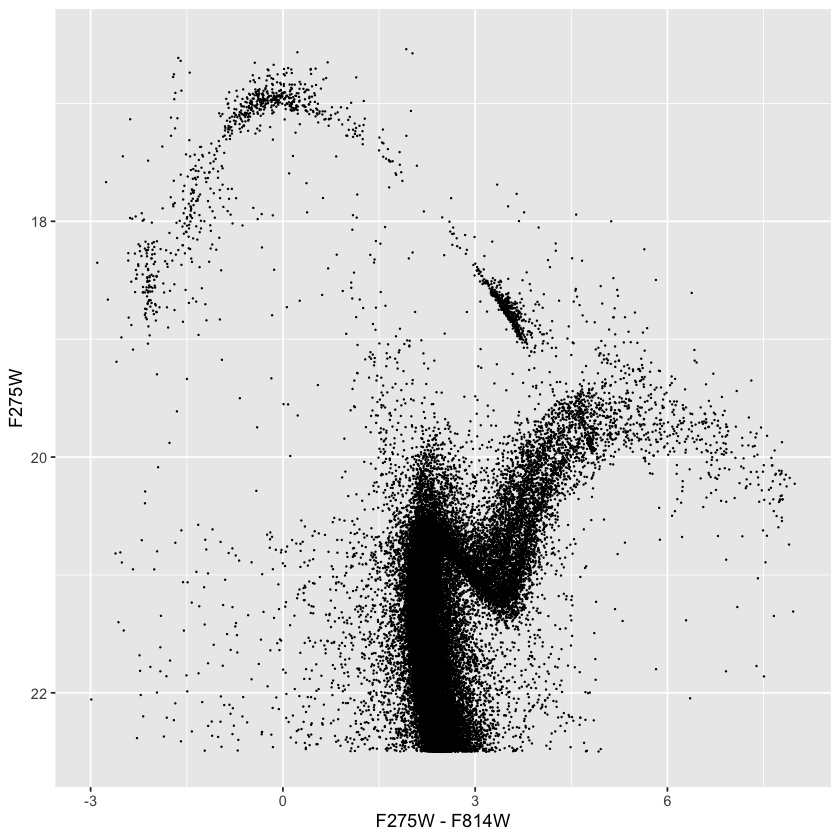

In [31]:
viz = ggplot(data=f_clean, aes(x=F275W-F814W,y=F275W)) + geom_point(size=0.01) + xlim(-3.0,8.0) + ylim(22.5,16.5)
viz

Warning message:
“Removed 148240 rows containing missing values (geom_point).”


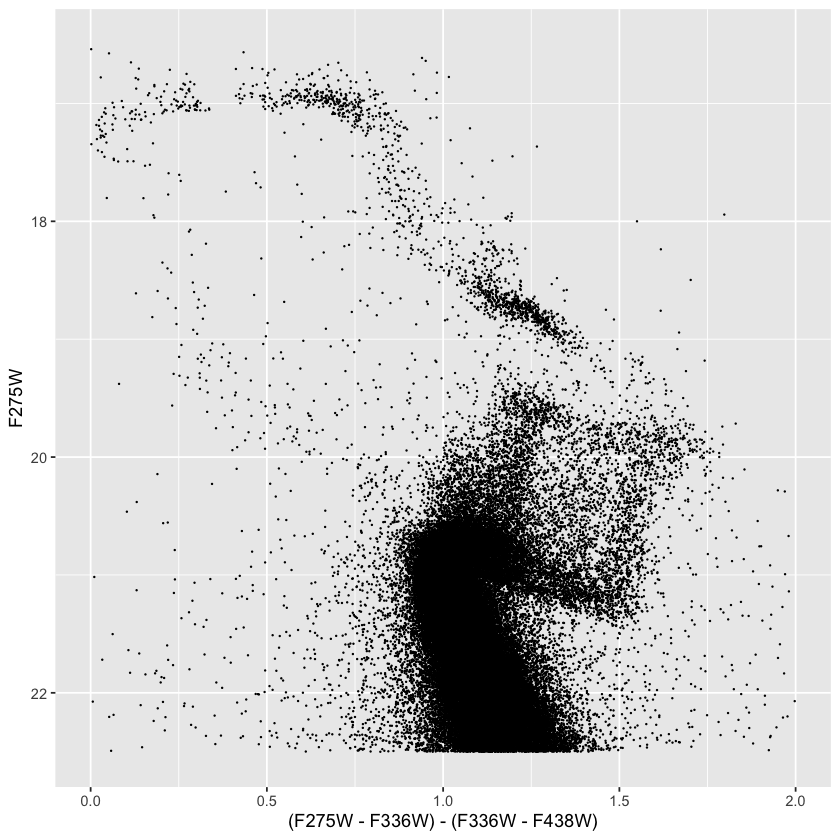

In [38]:
#In this case I'm going to need both the the F275 and F814 color and the
#C(F275,F336,F438) psudo color diagrams

#Here's the pseudo color one

viz = ggplot(data=f_clean, aes(x=(F275W-F336W)-(F336W-F438W),y=F275W)) + geom_point(size=0.01) + xlim(0.0,2.0) + ylim(22.5,16.5)
viz

In [51]:
#Now I need to "Fit" the red and blue sides of the RGB and measure the width in both the
#color and the pseudo color

fit = lm(F275W~poly(F275W-F814W,3,raw=TRUE),data=f_clean)

xx = seq(1,6,length=25)

viz = ggplot(data=f_clean, aes(x=F275W-F814W,y=F275W)) + lines(xx,predict(fit,data.frame(x=xx))) + geom_point(size=0.01) + xlim(-3.0,8.0) + ylim(22.5,16.5)
viz

ERROR: Error in poly(F275W - F814W, 3, raw = TRUE): object 'F275W' not found


In [71]:
x_dat = seq(0.0,10.0,length=25)
y_dat = seq(0.0,5,length=25)

f_dat = data.frame(x_dat,y_dat)

In [72]:
fit = lm(y_dat~x_dat)

f_dat_fit = cbind(f_dat, new_col=predict(fit,x_dat))

viz = ggplot(f_dat,aes(x=x_dat,y=y_dat)) + geom_point() + lines(x_dat,predict(fit,x_dat))

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): 'data' must be a data.frame, environment, or list


In [ ]:
predict(fit)